In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\srita\Downloads\Bank_customers_data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Customer ID', 'Name', 'Surname', 'Gender', 'Age',
       'Region', 'Job Classification', 'Date Joined', 'Balance', 'loan',
       'score', 'loan_eligibility'],
      dtype='object')

In [4]:
df.dtypes


Unnamed: 0              int64
Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
loan                  float64
score                 float64
loan_eligibility      float64
dtype: object

# Checking for NULL Values

In [5]:
(df.isnull().sum().sort_values(ascending=False))

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

# seperting data into numerical and categorical

In [6]:
df_num=df.select_dtypes(include=[np.number])

In [7]:
df_cat=df.select_dtypes(include=['object']) 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# outlier processing of numerical data

In [9]:
df_num.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


<Axes: >

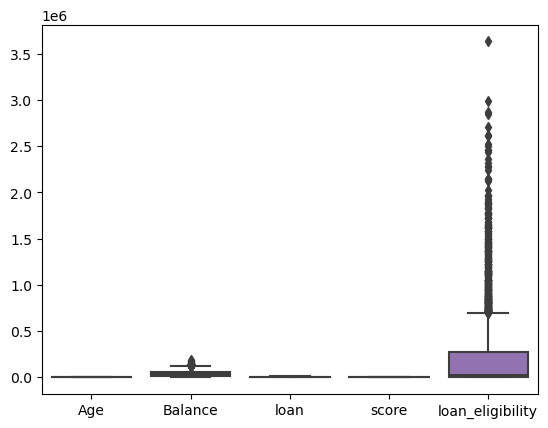

In [10]:
sns.boxplot(df_num[['Age','Balance','loan','score','loan_eligibility']])

In [11]:
df_num=df_num[['Age','Balance','loan','score','loan_eligibility']]

In [12]:
df_num.describe()

,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


In [13]:
q1=0
q3=2.787510e+05
llimt=0
ulimit=2.787510e+05*1.15

In [14]:
df_num_1=df_num[(df_num["loan_eligibility"]>llimt) & (df_num["loan_eligibility"]<ulimit)]

<Axes: >

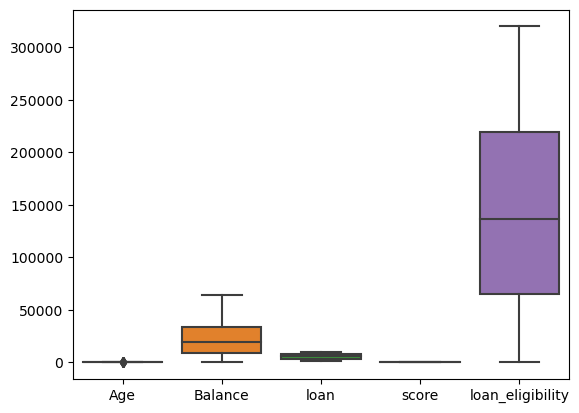

In [15]:
sns.boxplot(df_num_1)

# Scaling 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mms=MinMaxScaler()

In [18]:
df_num_s=mms.fit_transform(df_num_1)

# encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df_cat1=df_cat.loc[df_num_1.index.values,]

In [22]:
df_cat_e=df_cat1.apply(le.fit_transform)

In [23]:
df_cat_e

,Name,Surname,Gender,Region,Job Classification,Date Joined
4,41,109,0,0,0,72
6,46,133,0,0,0,92
9,44,100,1,0,2,103
10,44,72,1,0,2,103
15,119,94,1,0,2,122
...,...,...,...,...,...,...
3988,155,10,1,0,2,257
3991,12,27,1,0,2,257
3992,82,132,1,0,2,257
4004,83,47,1,0,2,266


In [24]:
pd.DataFrame(df_num_s)

,0,1,2,3,4
0,0.487805,0.556861,0.176379,0.263819,0.556861
1,0.390244,0.670021,0.182829,0.419598,0.670021
2,0.585366,0.170379,0.369996,0.816583,0.682055
3,0.536585,0.619818,0.601423,0.404523,0.619818
4,0.585366,0.032906,0.471641,0.500000,0.032906
...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.577562
1267,0.000000,0.365549,0.440836,0.419598,0.365549
1268,0.268293,0.471182,0.186165,0.180905,0.471182
1269,0.658537,0.131671,0.877113,0.703518,0.263522


In [25]:
df_cat_e.reset_index(inplace = True)

In [26]:
df_final=pd.concat([pd.DataFrame(df_num_s),df_cat_e],axis=1)

In [27]:
df_final

,0,1,2,3,4,index,Name,Surname,Gender,Region,Job Classification,Date Joined
0,0.487805,0.556861,0.176379,0.263819,0.556861,4,41,109,0,0,0,72
1,0.390244,0.670021,0.182829,0.419598,0.670021,6,46,133,0,0,0,92
2,0.585366,0.170379,0.369996,0.816583,0.682055,9,44,100,1,0,2,103
3,0.536585,0.619818,0.601423,0.404523,0.619818,10,44,72,1,0,2,103
4,0.585366,0.032906,0.471641,0.500000,0.032906,15,119,94,1,0,2,122
...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.577562,3988,155,10,1,0,2,257
1267,0.000000,0.365549,0.440836,0.419598,0.365549,3991,12,27,1,0,2,257
1268,0.268293,0.471182,0.186165,0.180905,0.471182,3992,82,132,1,0,2,257
1269,0.658537,0.131671,0.877113,0.703518,0.263522,4004,83,47,1,0,2,266


In [28]:
df_final.drop(['index','Name','Surname'],axis=1,inplace=True)

In [29]:
df_final.drop(['Date Joined'],axis=1,inplace=True)

In [30]:
df_final.head()

,0,1,2,3,4,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.032906,1,0,2


In [31]:
df_final.rename(columns={0:'Age',1:'Balance',2:'loan',3:'score',4:'loan_eligibility'},inplace=True)

In [32]:
df_final.head()

,Age,Balance,loan,score,loan_eligibility,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.032906,1,0,2


In [33]:
X=df_final.drop(['loan_eligibility'],axis=1)
y=df_final['loan_eligibility']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [35]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///C:/banking_mlfow1'

In [36]:
import mlflow

In [37]:
mlflow.set_experiment("wine-quality")

<Experiment: artifact_location='file:///C:/banking_mlfow1/642506959552595083', creation_time=1716612045194, experiment_id='642506959552595083', last_update_time=1716612045194, lifecycle_stage='active', name='wine-quality', tags={}>

In [38]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_training_score", testing_score_rf)
    mlflow.log_metric("gbm_training_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

    
    

C:\Users\srita\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [39]:
import requests
import json

#data = {"columns": iris.feature_names, "data": [[6.1, 2.8, 4.7, 1.2]]}
data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8002/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.4511474487192679, 0.19464453139975782, 0.10031752011671953, 0.7111414478895286, 0.7148018155816701, 0.07074587547819271, 0.36226991287361476, 0.22313774973306677, 0.2859874161242735, 0.06673912576139712, 0.17302973410677253, 0.3502196821340338, 0.12256912415639047, 0.08240351299725537, 0.7508212608525263, 0.9107317773598647, 0.3137602717284785, 0.6640585543990755, 0.6526562281297187, 0.9271832340114111, 0.03163580441970072, 0.26708495426508255, 0.5672685047142128, 0.6466752629124807, 0.3369011847547131, 0.3409684059542072, 0.5611175134099096, 0.26145081776968093, 0.9308661294176971, 0.18396728914327443, 0.942282132151133, 0.03066039612988026, 0.12380681228612643, 0.5149716080164257, 0.9315121651599828, 0.8633542616977178, 0.788640970284471, 0.41538283940287374, 0.15246006480197502, 0.4017430865874478, 0.12877901098113761, 0.4890845963078071, 0.492998240434784, 0.5391174960224459, 0.2818764197001572, 0.6155464137125672, 0.4814565942242151, 0.2764274777487131, 0.906936

In [40]:
predictions["predictions"]

[0.4511474487192679,
 0.19464453139975782,
 0.10031752011671953,
 0.7111414478895286,
 0.7148018155816701,
 0.07074587547819271,
 0.36226991287361476,
 0.22313774973306677,
 0.2859874161242735,
 0.06673912576139712,
 0.17302973410677253,
 0.3502196821340338,
 0.12256912415639047,
 0.08240351299725537,
 0.7508212608525263,
 0.9107317773598647,
 0.3137602717284785,
 0.6640585543990755,
 0.6526562281297187,
 0.9271832340114111,
 0.03163580441970072,
 0.26708495426508255,
 0.5672685047142128,
 0.6466752629124807,
 0.3369011847547131,
 0.3409684059542072,
 0.5611175134099096,
 0.26145081776968093,
 0.9308661294176971,
 0.18396728914327443,
 0.942282132151133,
 0.03066039612988026,
 0.12380681228612643,
 0.5149716080164257,
 0.9315121651599828,
 0.8633542616977178,
 0.788640970284471,
 0.41538283940287374,
 0.15246006480197502,
 0.4017430865874478,
 0.12877901098113761,
 0.4890845963078071,
 0.492998240434784,
 0.5391174960224459,
 0.2818764197001572,
 0.6155464137125672,
 0.4814565942242151

In [41]:
X_test.head()

,Age,Balance,loan,score,Gender,Region,Job Classification
479,0.536585,0.212578,0.523020,0.572864,0,0,0
570,0.609756,0.101814,0.427491,0.623116,1,0,2
873,0.487805,0.100027,0.530472,0.022613,1,0,2
227,0.390244,0.719375,0.943283,0.331658,0,0,1
195,0.390244,0.722591,0.129226,0.314070,1,0,1


In [42]:
x_pre=pd.concat([X_test[["Age","Balance","loan","score"]].reset_index(),pd.DataFrame(predictions["predictions"]).reset_index()],axis=1)


In [43]:
x_pre.head()

,index,Age,Balance,loan,score,index,0
0,479,0.536585,0.212578,0.523020,0.572864,0,0.451147
1,570,0.609756,0.101814,0.427491,0.623116,1,0.194645
2,873,0.487805,0.100027,0.530472,0.022613,2,0.100318
3,227,0.390244,0.719375,0.943283,0.331658,3,0.711141
4,195,0.390244,0.722591,0.129226,0.314070,4,0.714802


In [44]:
x_pre.drop(['index'],axis=1,inplace=True)

In [45]:
x_pred_results=pd.DataFrame(mms.inverse_transform(x_pre))

In [46]:
x_pred_results[4]

0      144380.977173
1       62324.950064
2       32149.465606
3      227553.811490
4      228724.773730
           ...      
377     13903.963531
378    142310.913812
379     63994.234196
380    200841.459865
381     10176.152765
Name: 4, Length: 382, dtype: float64

In [47]:
from numpy import savetxt

In [48]:
savetxt('predictions.csv', x_pred_results[4], delimiter=',')

In [49]:
mlflow.log_artifact("predictions.csv")